#📌 Extracción

In [16]:
import pandas as pd
import json

In [17]:
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

In [19]:
# Normalizando datos.
df_normalized = pd.json_normalize(
    data,
    meta=[
        'customerID',
        'Churn',
        ['customer', 'gender'],
        ['customer', 'SeniorCitizen'],
        ['customer', 'Partner'],
        ['customer', 'Dependents'],
        ['customer', 'tenure'],
        ['phone', 'PhoneService'],
        ['phone', 'MultipleLines'],
        ['internet', 'InternetService'],
        ['internet', 'OnlineSecurity'],
        ['internet', 'OnlineBackup'],
        ['internet', 'DeviceProtection'],
        ['internet', 'TechSupport'],
        ['internet', 'StreamingTV'],
        ['internet', 'StreamingMovies'],
        ['account', 'Contract'],
        ['account', 'PaperlessBilling'],
        ['account', 'PaymentMethod'],
        ['account', 'Charges', 'Monthly'],
        ['account', 'Charges', 'Total']
    ]
)

In [20]:
# Renombrando columnas
df_normalized.columns = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

In [21]:
# muestra de los datos normalizados
print(df_normalized.sample())

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
2526  3523-QRQLL   Yes  Female              0     Yes        Yes      22   

     PhoneService MultipleLines InternetService  ... OnlineBackup  \
2526          Yes            No             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
2526               No          No         Yes             Yes  One year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  
2526              Yes  Bank transfer (automatic)           69.5        1498.2  

[1 rows x 21 columns]


In [22]:
# Valores nulos por columna
print("Valores ausentes por columna:")
print(df_normalized.isnull().sum())

Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [27]:
df_normalized['TotalCharges'] = df_normalized['TotalCharges'].replace(' ', pd.NA)

In [28]:
df_normalized['TotalCharges'] = pd.to_numeric(df_normalized['TotalCharges'])

In [29]:
df_normalized['TotalCharges'] = df_normalized['TotalCharges'].fillna(df_normalized['TotalCharges'].mean())


In [26]:
df_normalized['TotalCharges'].fillna(df_normalized['TotalCharges'].mean(), inplace=True)

/tmp/ipython-input-2749293483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalized['TotalCharges'].fillna(df_normalized['TotalCharges'].mean(), inplace=True)


In [30]:
print("Valores ausentes en TotalCharges después de la conversión y manejo:")
print(df_normalized['TotalCharges'].isnull().sum())

Valores ausentes en TotalCharges después de la conversión y manejo:
0


In [31]:
# Revisar duplicados
num_duplicates = df_normalized.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


In [32]:
# revisando columna gender
print("Valores únicos en la columna 'gender':")
print(df_normalized['gender'].value_counts())

Valores únicos en la columna 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64


In [33]:
# revisando columna senioCitizen
print("Valores únicos en la columna 'SeniorCitizen':")
print(df_normalized['SeniorCitizen'].value_counts())

Valores únicos en la columna 'SeniorCitizen':
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64


In [34]:
print("Estadísticas descriptivas de columnas numéricas:")
print(df_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Estadísticas descriptivas de columnas numéricas:
            tenure  MonthlyCharges  TotalCharges
count  7267.000000     7267.000000   7267.000000
mean     32.346498       64.720098   2280.634213
std      24.571773       30.129572   2266.915104
min       0.000000       18.250000     18.800000
25%       9.000000       35.425000    401.400000
50%      29.000000       70.300000   1394.550000
75%      55.000000       89.875000   3778.525000
max      72.000000      118.750000   8684.800000


In [35]:
# Creando columna cuentas diarias
df_normalized['Cuentas_Diarias'] = df_normalized['MonthlyCharges'] / 30

In [37]:
# Revisando muestra
df_normalized.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
2242,3132-TVFDZ,Yes,Male,1,Yes,No,57,No,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.85,2572.95,1.495000
999,1400-WIVLL,No,Male,0,Yes,No,57,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,107.95,5969.85,3.598333
130,0219-YTZUE,Yes,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,371.90,2.826667
1057,1480-BKXGA,No,Male,1,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8404.90,3.868333
6302,8668-KNZTI,No,Male,0,No,No,52,Yes,No,DSL,...,Yes,No,No,No,One year,No,Electronic check,53.75,2790.65,1.791667
1048,1465-WCZVT,No,Female,0,Yes,Yes,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,60.65,0.655000
6396,8780-RSYYU,No,Female,0,No,No,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.20,532.10,0.640000
5092,6961-VCPMC,Yes,Male,1,Yes,No,46,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.40,3605.20,2.680000
5802,7932-WPTDS,Yes,Female,1,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,0.826667
4338,5955-EPOAZ,No,Female,0,No,No,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.95,109.50,0.698333


#🔧 Transformación

In [38]:
# convirtiendo datos a binarios
mapeo_binario = {'Yes': 1, 'No': 0}
columnas_a_convertir = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

In [39]:
for columna in columnas_a_convertir:
    df_normalized[columna] = df_normalized[columna].map(mapeo_binario)

In [40]:
# Manejando valor No phone servise
df_normalized['MultipleLines'] = df_normalized['MultipleLines'].replace('No phone service', 'No')
df_normalized['MultipleLines'] = df_normalized['MultipleLines'].map(mapeo_binario)

In [41]:
# Mostrando datos
print(df_normalized[columnas_a_convertir + ['MultipleLines']].head())
print("\nTipos de datos después de la conversión:")
print(df_normalized[columnas_a_convertir + ['MultipleLines']].dtypes)

   Churn  Partner  Dependents  PhoneService  OnlineSecurity  OnlineBackup  \
0    0.0        1           1             1             0.0           1.0   
1    0.0        0           0             1             0.0           0.0   
2    1.0        0           0             1             0.0           0.0   
3    1.0        1           0             1             0.0           1.0   
4    1.0        1           0             1             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0               0.0          1.0          1.0              0.0   
1               0.0          0.0          0.0              1.0   
2               1.0          0.0          0.0              0.0   
3               1.0          0.0          1.0              1.0   
4               0.0          1.0          1.0              0.0   

   PaperlessBilling  MultipleLines  
0                 1              0  
1                 0              1  
2                 1          

#📊 Carga y análisis

In [42]:
print("Estadísticas descriptivas para columnas numéricas:")
print(df_normalized[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']].describe())

Estadísticas descriptivas para columnas numéricas:
            tenure  MonthlyCharges  TotalCharges  Cuentas_Diarias
count  7267.000000     7267.000000   7267.000000      7267.000000
mean     32.346498       64.720098   2280.634213         2.157337
std      24.571773       30.129572   2266.915104         1.004319
min       0.000000       18.250000     18.800000         0.608333
25%       9.000000       35.425000    401.400000         1.180833
50%      29.000000       70.300000   1394.550000         2.343333
75%      55.000000       89.875000   3778.525000         2.995833
max      72.000000      118.750000   8684.800000         3.958333


In [43]:
print("\nDistribución de columnas categóricas y binarias:")

# Columnas binarias (que ya convertiste a 0 y 1)
binary_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'SeniorCitizen'
]

for col in binary_cols:
    print(f"\nColumna: {col}")
    print(df_normalized[col].value_counts())
    print(df_normalized[col].value_counts(normalize=True) * 100) # Porcentaje

# Otras columnas categóricas (que no son binarias como servicio de internet, contrato, etc.)
categorical_cols = [
    'gender', 'InternetService', 'Contract', 'PaymentMethod'
]

for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df_normalized[col].value_counts())
    print(df_normalized[col].value_counts(normalize=True) * 100) # Porcentaje


Distribución de columnas categóricas y binarias:

Columna: Churn
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Columna: Partner
Partner
0    3749
1    3518
Name: count, dtype: int64
Partner
0    51.589377
1    48.410623
Name: proportion, dtype: float64

Columna: Dependents
Dependents
0    5086
1    2181
Name: count, dtype: int64
Dependents
0    69.987615
1    30.012385
Name: proportion, dtype: float64

Columna: PhoneService
PhoneService
1    6560
0     707
Name: count, dtype: int64
PhoneService
1    90.271088
0     9.728912
Name: proportion, dtype: float64

Columna: MultipleLines
MultipleLines
0    4202
1    3065
Name: count, dtype: int64
MultipleLines
0    57.823036
1    42.176964
Name: proportion, dtype: float64

Columna: OnlineSecurity
OnlineSecurity
0.0    3608
1.0    2078
Name: count, dtype: int64
OnlineSecurity
0.0    63.454098
1.0    36.545902
Name: proportion, dtype: float64

Columna: OnlineBac

/tmp/ipython-input-3602710667.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_normalized, palette='viridis')


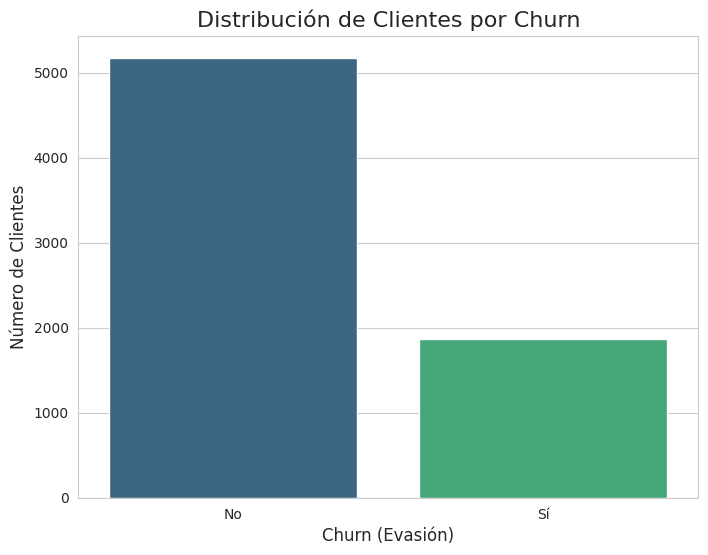

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear un gráfico de conteo (countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_normalized, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes por Churn', fontsize=16)
plt.xlabel('Churn (Evasión)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Reemplazar los valores 0 y 1 por 'No' y 'Sí' para una mejor lectura
plt.xticks([0, 1], ['No', 'Sí'])

# Mostrar el gráfico
plt.show()

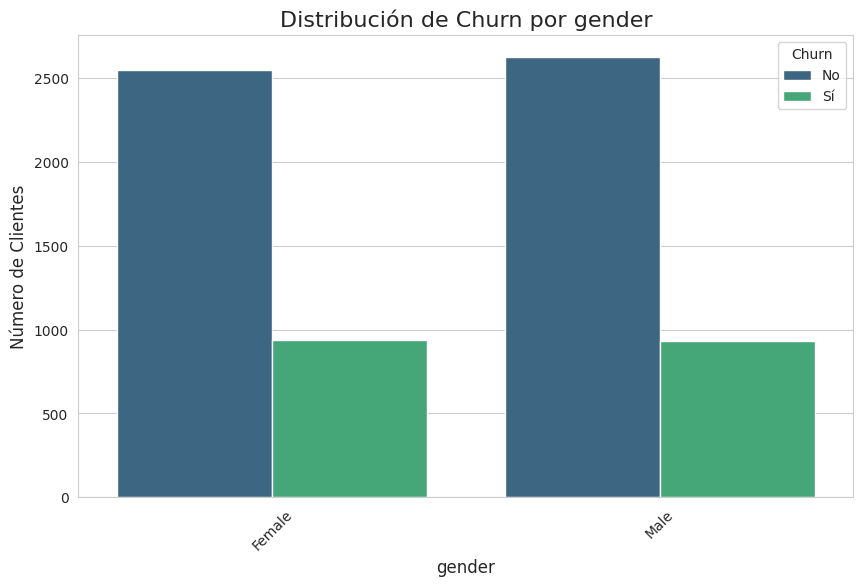

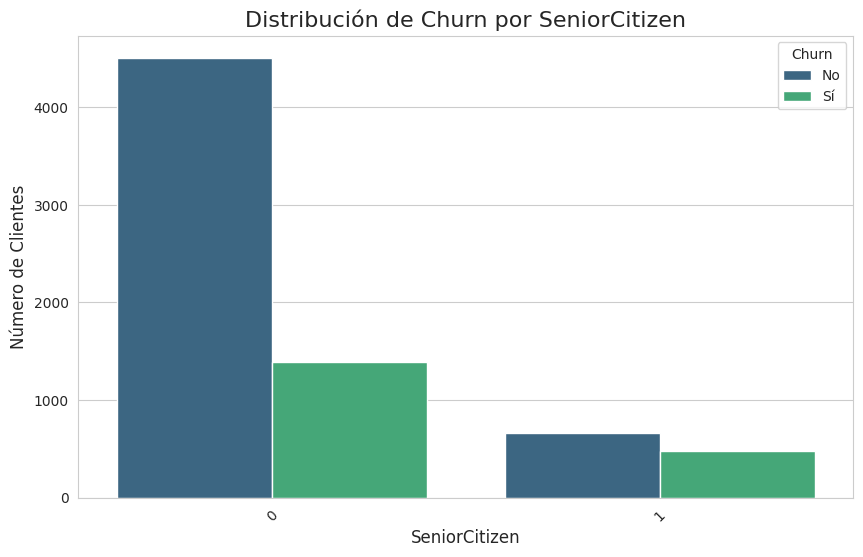

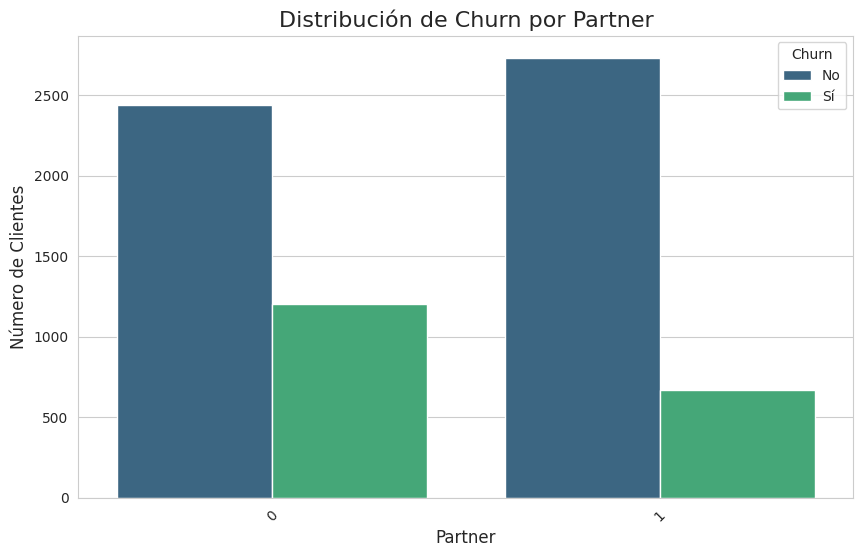

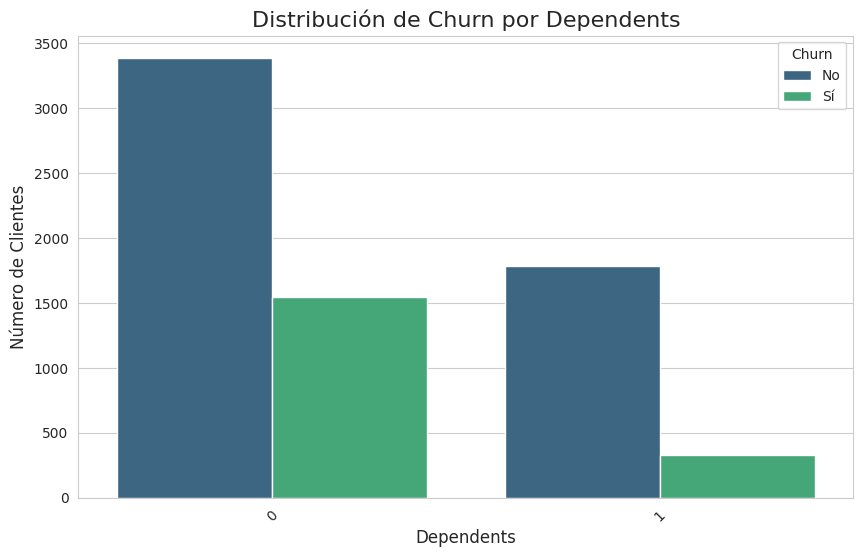

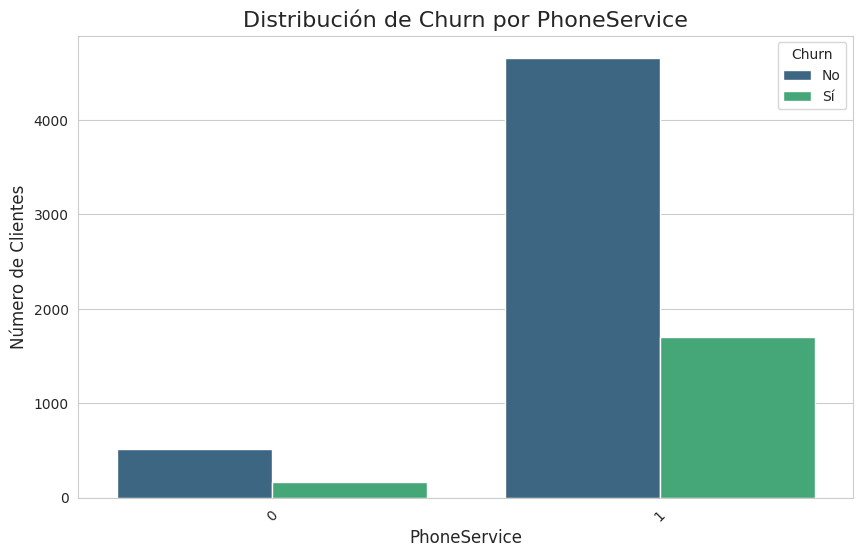

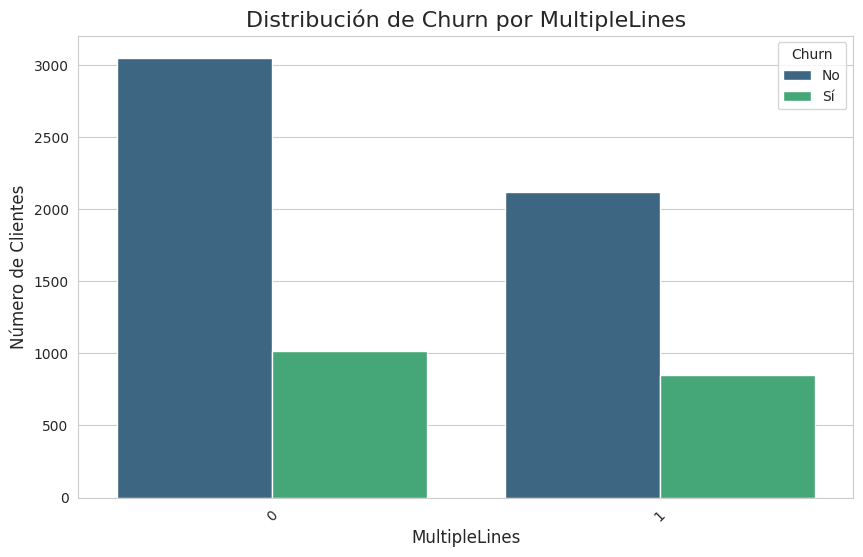

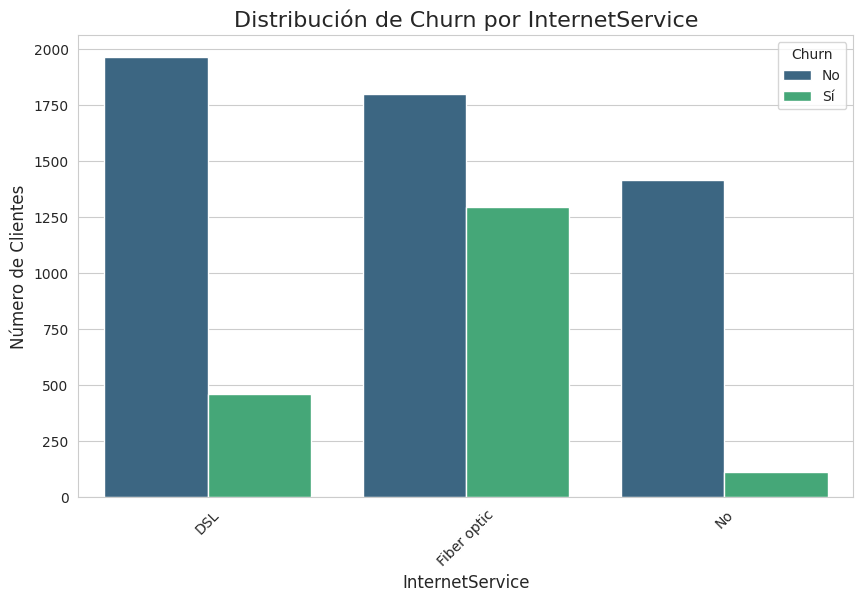

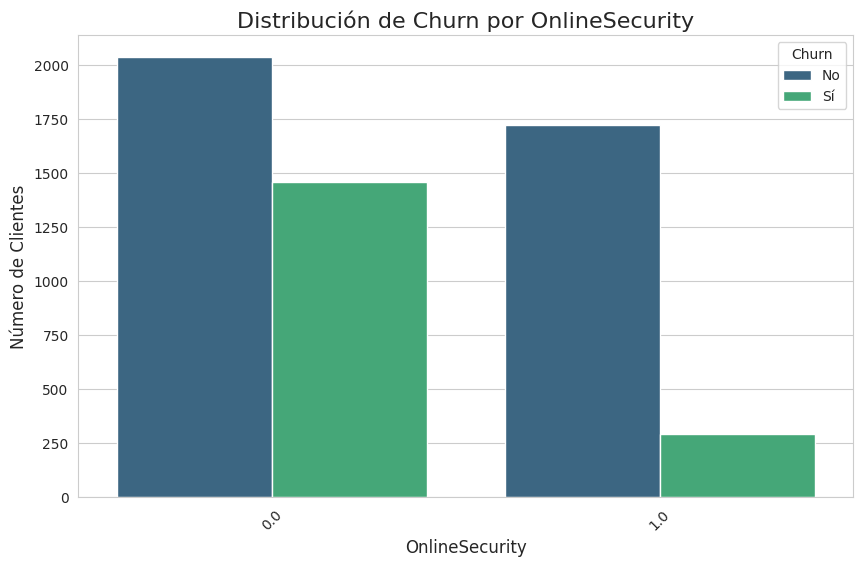

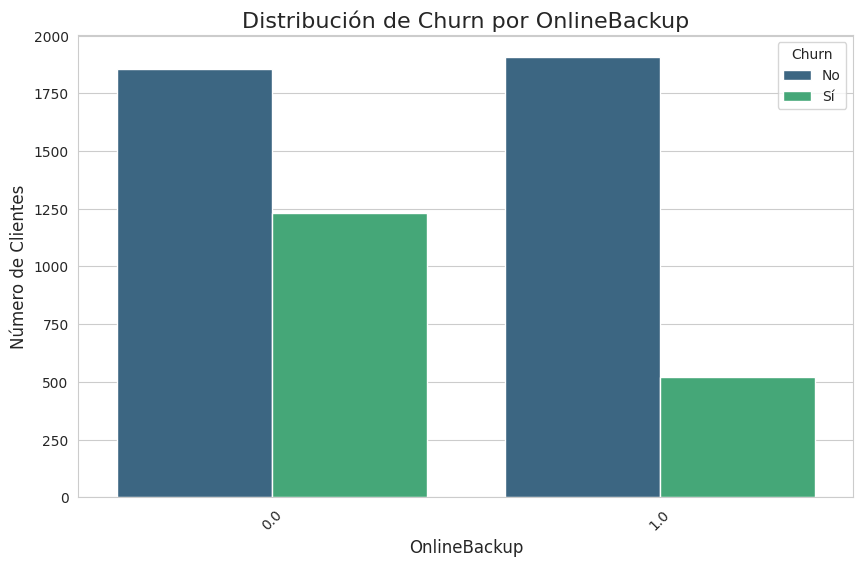

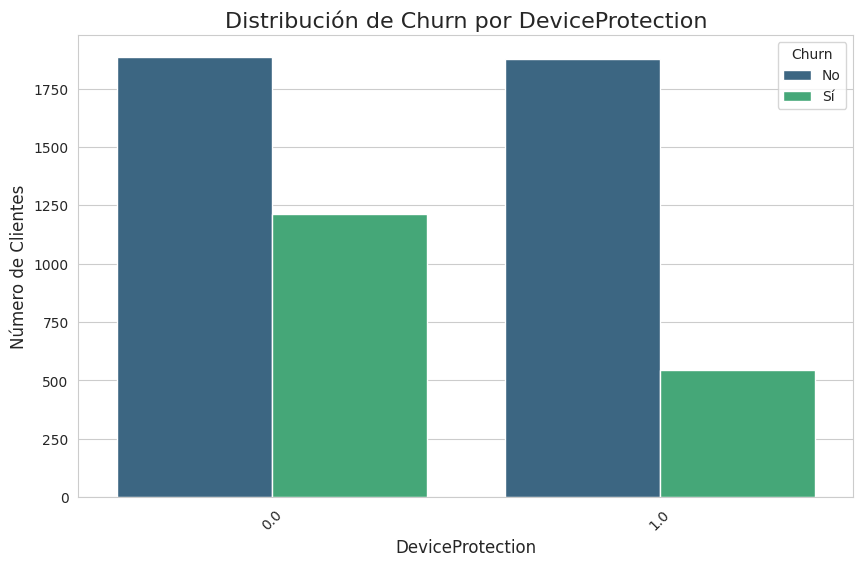

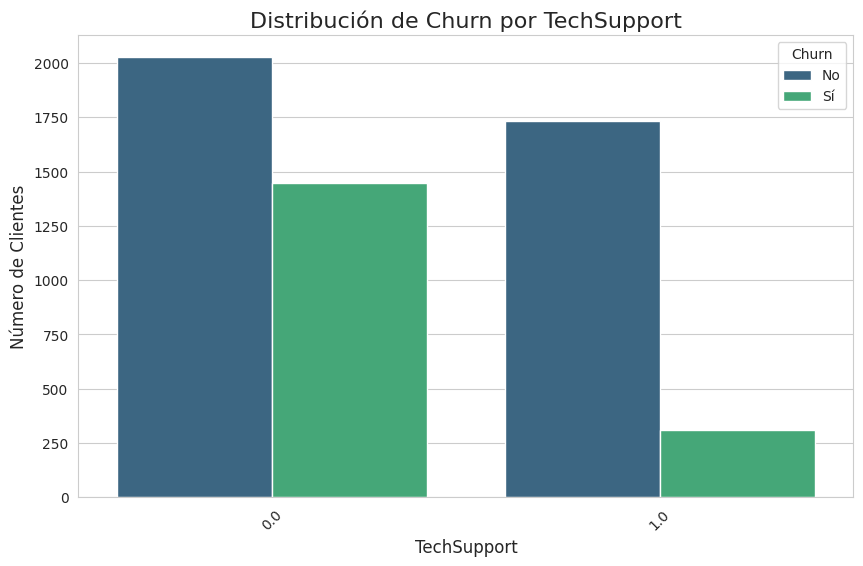

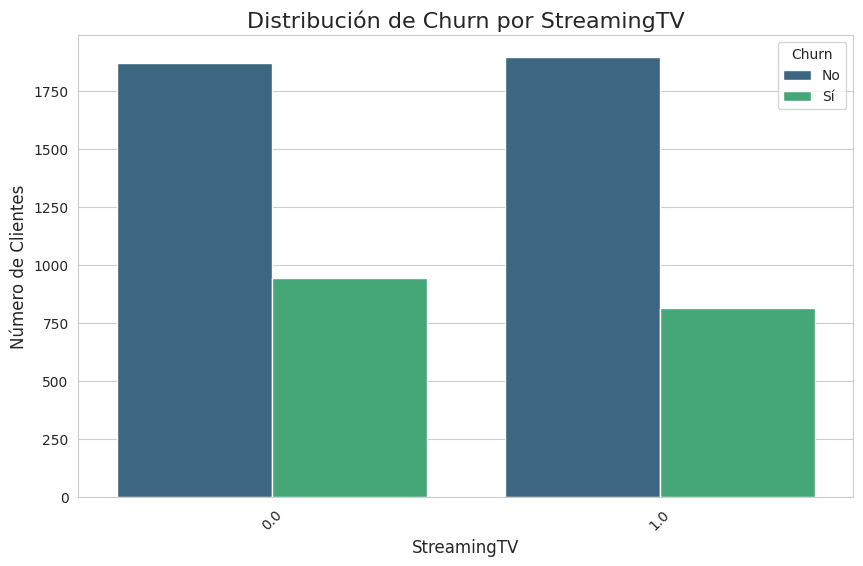

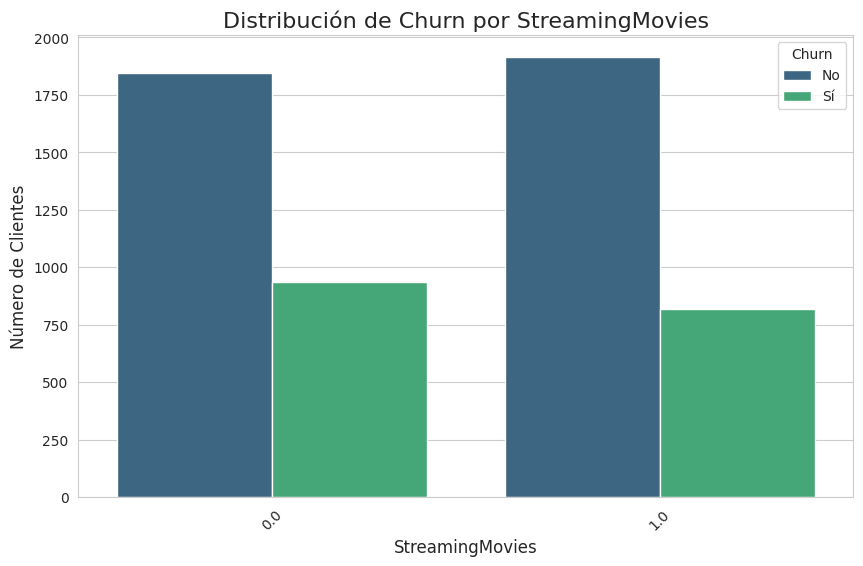

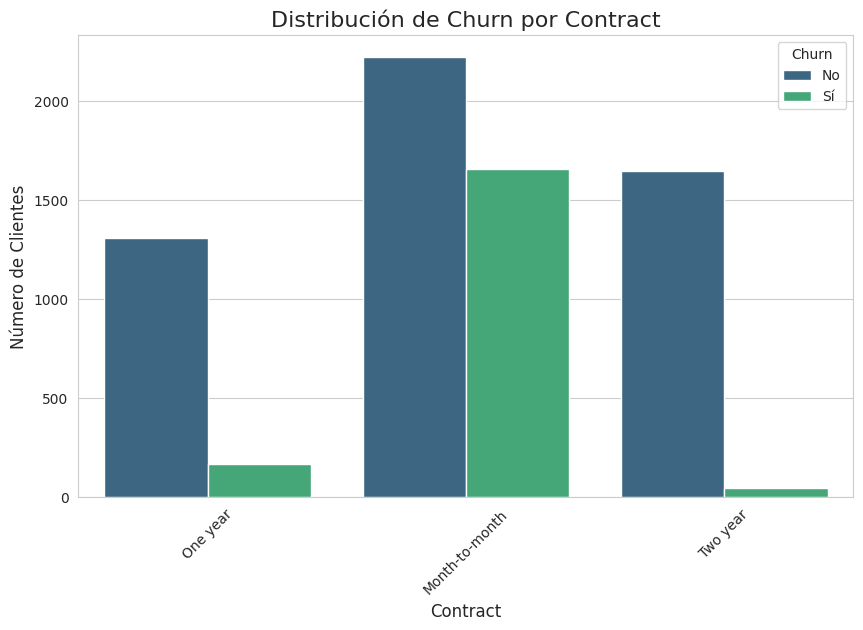

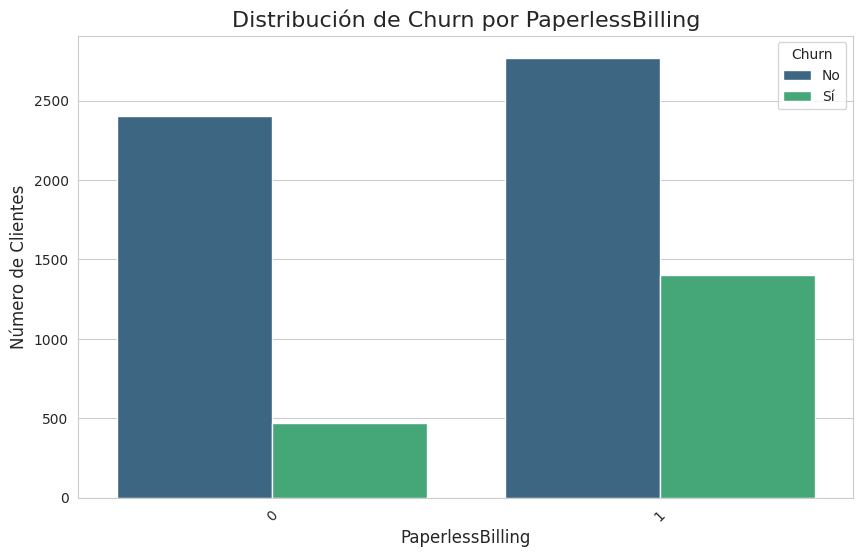

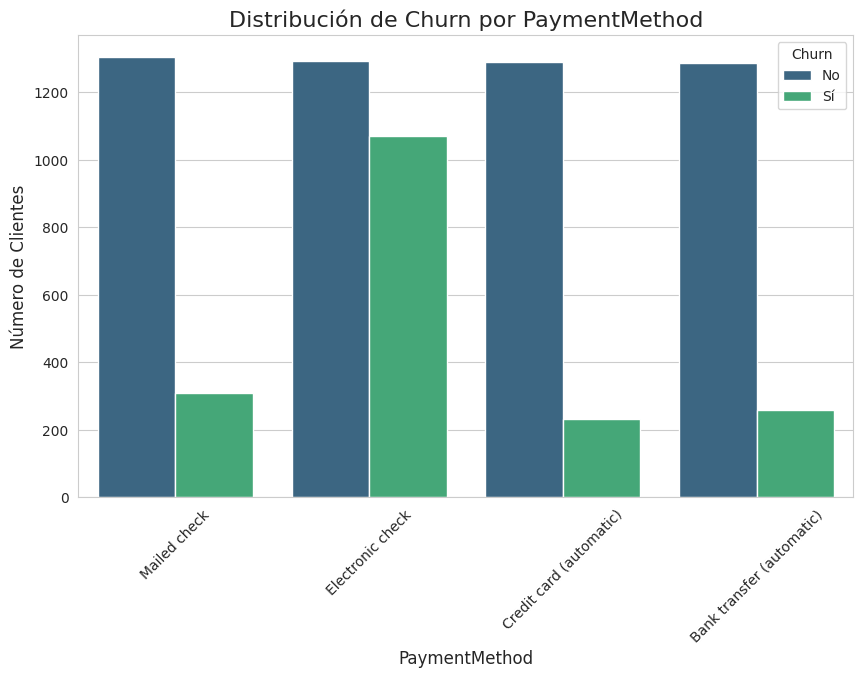

In [45]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Lista de columnas categóricas a analizar
columnas_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Crear un loop para generar un gráfico para cada columna
for col in columnas_categoricas:
    plt.figure(figsize=(10, 6))

    # Crea un gráfico de barras
    sns.countplot(
        x=col,
        hue='Churn',
        data=df_normalized,
        palette='viridis'
    )

    # Personalizar el gráfico
    plt.title(f'Distribución de Churn por {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Sí'])

    # Mostrar el gráfico
    plt.show()

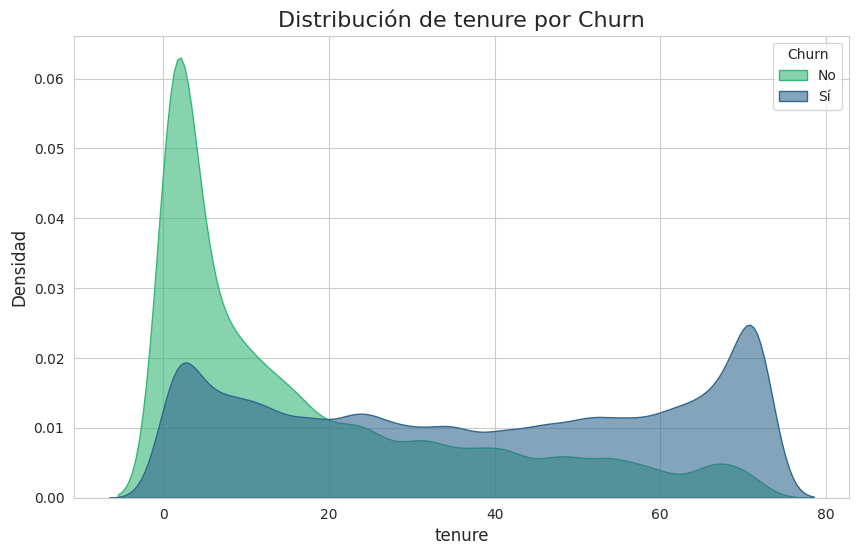

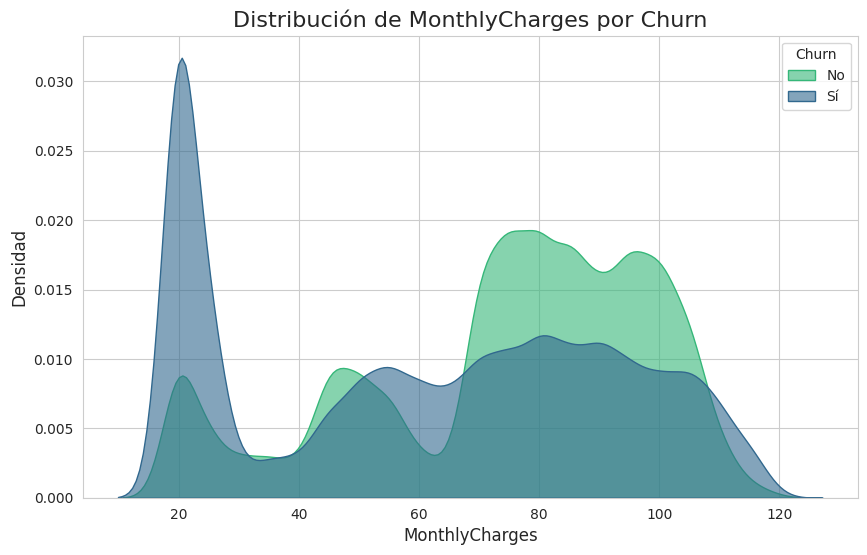

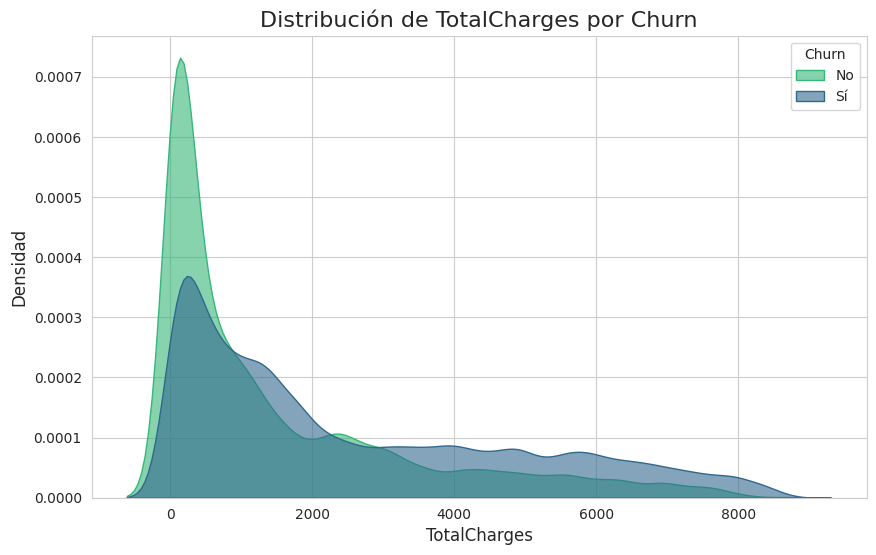

In [47]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Lista de columnas numéricas a analizar
columnas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Crear un bucle para generar un gráfico para cada columna
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))

    # Gráfico de densidad (KDE plot)
    sns.kdeplot(
        data=df_normalized,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        palette='viridis',
        alpha=0.6,
        bw_adjust=0.5
    )

    # Personalizar el gráfico
    plt.title(f'Distribución de {col} por Churn', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Sí'])

    # Mostrar el gráfico
    plt.show()

#📄Informe final

# 1. Introducción
El objetivo de este análisis es comprender el fenómeno de la evasión de clientes (Churn) en la empresa TelecomX. La evasión de clientes es un problema crítico que afecta directamente los ingresos y el crecimiento de la empresa. Mediante la exploración de los datos de clientes, buscamos identificar patrones y factores que influyen en la decisión de un cliente de cancelar su servicio, con el fin de desarrollar estrategias efectivas para la retención.

# 2. Limpieza y Tratamiento de Datos
El conjunto de datos original se encontraba en un archivo JSON con una estructura anidada. Para prepararlo para el análisis, se realizaron los siguientes pasos:

1. Normalización de JSON: Se utilizó la función pd.json_normalize() de la librería Pandas para aplanar la estructura de datos, extrayendo los campos anidados (customer, phone, internet, account) en columnas de un único DataFrame.

2. Manejo de Datos Faltantes: Se identificaron valores vacíos en la columna TotalCharges, que se reemplazaron por NaN y luego se imputaron con el valor promedio de la columna para evitar la pérdida de datos.

3. Estandarización de Datos: Las columnas con valores textuales "Yes" y "No" se convirtieron a un formato binario (1 y 0) para facilitar el análisis y el modelado.

4. Creación de Nuevas Características: Se creó una nueva columna, Cuentas_Diarias, calculada a partir de los MonthlyCharges (cargos mensuales) para obtener una visión más detallada del comportamiento de gasto diario de los clientes.

# 3. Análisis Exploratorio de Datos
Análisis de la Distribución de Churn
La variable Churn está desbalanceada, con un 73.4% de clientes que no han cancelado su servicio (Churn = 0) y un 26.6% que sí lo han hecho (Churn = 1). Este desbalance es un factor importante a considerar en futuros modelos predictivos.

Análisis por Variables Categóricas
Contrato: Los clientes con contratos de mes a mes tienen la mayor tasa de evasión, lo que sugiere una menor lealtad y un mayor riesgo de abandono.

Servicio de Internet: Los clientes con fibra óptica presentan una tasa de evasión significativamente más alta en comparación con aquellos que tienen DSL o no tienen servicio de internet.

Método de Pago: El cheque electrónico es el método de pago con la mayor tasa de evasión, lo que podría indicar una insatisfacción o una menor vinculación con el servicio.

Análisis por Variables Numéricas
Tiempo de Contrato (tenure): Los clientes que cancelaron el servicio tienden a tener un tiempo de contrato mucho más corto. La mayoría de los clientes que se dan de baja lo hacen en los primeros meses.

Cargos Mensuales (MonthlyCharges): Se observa que los clientes con cargos mensuales más altos son más propensos a la evasión. Esto podría estar relacionado con la percepción del valor del servicio.

Cargos Totales (TotalCharges): Los clientes que se dan de baja generalmente tienen un gasto total acumulado más bajo, lo que refuerza la idea de que la evasión ocurre en las primeras etapas de su relación con la empresa.

# 4. Conclusiones
El análisis reveló que la evasión no es un evento aleatorio, sino que está fuertemente relacionada con factores específicos. Los principales hallazgos son:

Riesgo Temprano: Los clientes con un bajo tiempo de contrato y bajos gastos totales son los más vulnerables a la evasión.

Perfiles de Alto Riesgo: Los clientes con contrato de mes a mes, que usan fibra óptica y pagan con cheque electrónico son los que tienen mayor propensión a cancelar.

El Precio como Factor: Los cargos mensuales elevados parecen estar correlacionados con una mayor evasión, lo que sugiere que el precio es un factor de insatisfacción.

# 5. Recomendaciones
Con base en los hallazgos, se sugieren las siguientes acciones estratégicas para mitigar la evasión:

1. Programas de Retención para Clientes Nuevos: Implementar campañas de seguimiento proactivo para clientes en sus primeros meses de servicio (tenure bajo), ofreciendo soporte personalizado o incentivos para crear lealtad.

2. Incentivos para Contratos Largos: Ofrecer descuentos o beneficios adicionales para los clientes que cambien de un contrato de mes a mes a un contrato de uno o dos años.

3. Monitoreo del Precio: Evaluar la percepción de valor del servicio de fibra óptica y los planes con cargos mensuales altos. Se podría considerar la creación de paquetes más competitivos o la mejora de los servicios asociados.

4. Optimización del Método de Pago: Fomentar el uso de métodos de pago más estables y recurrentes, como la domiciliación bancaria, en lugar de cheques electrónicos, a través de promociones o facilidad de uso.